In [101]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


%matplotlib inline

plt.rc('axes', labelsize=20) 
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13) 
mpl.rcParams['axes.titlesize'] = 24

In [109]:
election_results = pd.read_csv('data/processed_data/elections_camaras_municipais_portugal.csv', index_col='INE_ID')

In [110]:
# Get only relevant rows
data_on_ballot_order = election_results[
    (election_results.position_ballot.notnull()) & 
    (election_results.problems_ballot_order == False)
]

# Check relation between ballot length and % votes. Intituition says that the longer the ballot, the less votes each party will have. Just a sanity check.

In [111]:
# Add column with the number of options in ballot
ballot_lengths = {}
for concelho in data_on_ballot_order.concelho.unique():
    ballot_length = data_on_ballot_order[data_on_ballot_order.concelho == concelho].position_ballot.max()
    ballot_lengths[concelho] = ballot_length
data_on_ballot_order['ballot_length'] = data_on_ballot_order.concelho.apply(lambda concelho: ballot_lengths[concelho])

/home/lcampos/Envs/local-elections-analysis/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
data_on_ballot_order.ballot_length.describe()

count    1311.000000
mean        4.736079
std         1.389350
min         2.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: ballot_length, dtype: float64

Correlation Cofficient: -0.290224866869
p-value: 7.34822752002e-27


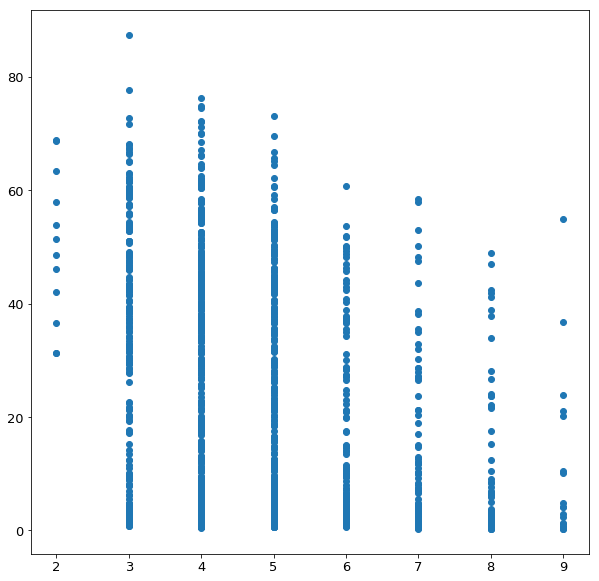

In [114]:
x = data_on_ballot_order.ballot_length
y = data_on_ballot_order['votes_%']

plt.scatter(x, y)

corr_cof, p_value = pearsonr(x, y)
print 'Correlation Cofficient: {}'.format(corr_cof)
print 'p-value: {}'.format(p_value)

# Check correlation between position in the ballot and percentage of votes.

Correlation Cofficient: -0.0861749146916
p-value: 0.00178997650752


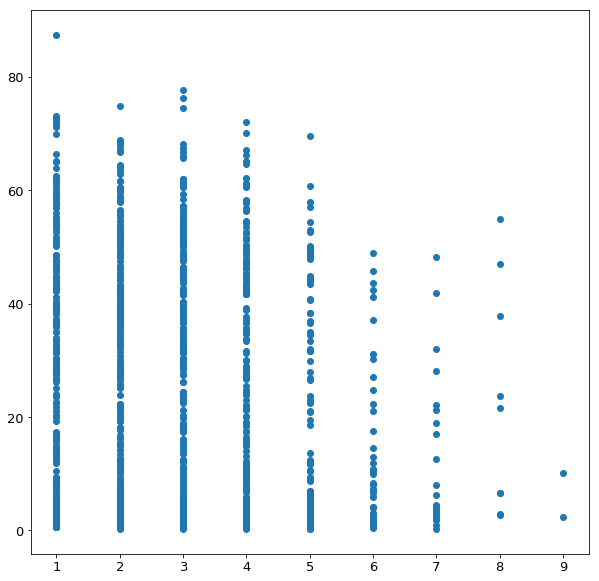

In [54]:
plt.scatter(data_on_ballot_order.position_ballot, data_on_ballot_order['votes_%'])

corr_cof, p_value = pearsonr(data_on_ballot_order.position_ballot, data_on_ballot_order['votes_%'])
print 'Correlation Cofficient: {}'.format(corr_cof)
print 'p-value: {}'.format(p_value)

### This direct correlation does not make sense, in light of knowing that in longer ballots each party receives less % of votes. Positions 1 and 2 in ballot always ocurr, in cases of smaller and longer ballots, on cases of both more and less diluted % of votes. More advanced positions ocur more rarely and when their ocurr the % of votes is more diluted. So it's expected that more advanced positions in ballot receive less votes, even whitout counting with voter's bias, if it exists. 

### Now I'll have to find a way to differentiate between the effect of the length of the ballot and voter bias. 